In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df.drop('CUST_ID', axis=1, inplace=True)
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())
df = df.dropna(axis = 0, subset = ['CREDIT_LIMIT'])

In [115]:
class PCA ():

    def __init__(self,n_components = 0.95):
        self.n_components = n_components
        if self.n_components > 1:
            self.type = 'var'
        else:
            self.type = 'ratio'

    def fit(self,X):

        self.mean = X.mean(axis=0)
        self.variance = X.std(axis=0)
        # fill
        X = (X - self.mean)/self.variance
        Cov= X.T.dot(X)
        self.eigenvalues = np.linalg.eig(Cov)[0]
        self.components =np.linalg.eig(Cov)[1]
        if type == 'var':
            self.components = self.components[:,0:self.n_components]
        else:
            self.components = self.components[:,0:np.argmax(np.cumsum(self.eigenvalues)/np.sum(self.eigenvalues)>self.n_components)]
        X_new = X @ self.components        
        return X_new

    def transform(self,Z):
        # fill
        Z=(Z-self.mean)/self.variance
        Z_new = Z.dot(self.components)
        return Z_new

    #optional 
    def plot_explained_variance(self):
        plt.plot(np.cumsum(self.eigenvalues)/np.sum(self.eigenvalues))
        if self.type == 'var':
            plt.axvline(int(self.n_components), color='r', linestyle='-')
        else:
            plt.axhline(self.n_components, color='r', linestyle='-')
        plt.show()

In [116]:
pca_section = PCA(n_components=0.95)
X_transofmed = pca_section.fit(df.values)

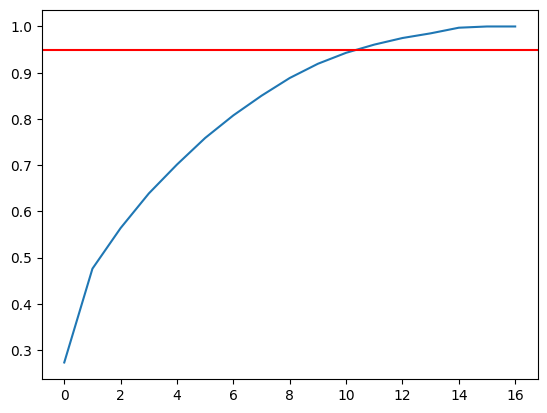

In [117]:
pca_section.plot_explained_variance()

In [53]:
print(pca_section.components.shape)
print(pca_section.components)

print("expected shape: (17,11)")

(17, 11)
[[ 0.10100162 -0.40397099  0.15990093  0.28367256 -0.04695824 -0.03981946
  -0.25222072 -0.16991378  0.12991935  0.03108099 -0.1468211 ]
 [ 0.11990312 -0.13057912  0.42037918  0.14967783  0.48501686 -0.03366755
   0.10429816  0.2593711   0.62132817 -0.08152461  0.11861695]
 [ 0.41167022 -0.04111197 -0.25777856  0.03878684 -0.03054746 -0.1769038
   0.20301756  0.01982939  0.105048    0.05123657 -0.20094879]
 [ 0.34643121 -0.06293748 -0.39208387  0.07747549  0.15660263 -0.1845277
   0.12135981  0.12558653  0.01789131 -0.17563518 -0.44790262]
 [ 0.33683409  0.01847871  0.1107286  -0.05065074 -0.35990966 -0.07926235
   0.25714406 -0.18387359  0.21551933  0.44375338  0.34764977]
 [-0.02341367 -0.43922298  0.02749053 -0.25449076 -0.09761894  0.14629241
  -0.05010915 -0.02121819 -0.05127406 -0.35912349  0.35456913]
 [ 0.32149689  0.19076437  0.37492109 -0.18851747  0.09220684  0.03851968
  -0.15561901 -0.03406114 -0.22201249 -0.25083666 -0.1175436 ]
 [ 0.29463737  0.01787879 -0.11516

In [52]:
pca_section.transform(df.values).shape

(8949, 11)

In [ ]:
class Solution:
    def frequencySort(self, s: str) -> str:
        mp={}
        for i in s:
            mp[i]=mp.get(i,0)+1
        def sqrt(x,y):
            return mp[x]>mp[y]
        x=sorted(s,)